In [7]:
import csv
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

load('/NumericalSemigroup.sage')
load('/KunzPoset.sage')
load('/PlotKunzPoset.sage')

true
Successfully loaded Singular


In [8]:
#create your file location
file_location = '/home/sage/notebooks/Documents/Semigroup_Research/'

In [9]:
def csv_creation_no_repeats(min_elem, dimension = 0, csv_file_path = file_location):
    """Provide a minimal element and optional dimension and program creates a csv file of given minimal element and dimension
        Args: 
            min_elem (int)
            dimension(int): defaults to 0 which creates a csv that assumes we are not picking any specific dimension
    """
    
    if dimension == 0:
        facfile = csv_file_path + 'full_face_lattice_m3-14/m%d.fac' % min_elem
        hpfile = csv_file_path + 'full_face_lattice_m3-14/m%d.out' % min_elem

        mybigtable = set([])

        for P in KunzPoset.IterateFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile):
            entry = (P.m, len(P.atoms) + 1, len(P.poset.maximal_elements()), len(P.FullMinimalPresentation()), P.Dimension())
            mybigtable = mybigtable | set([entry])

        mybigtable = sorted(list(set(mybigtable)))

        #Write tuples into a CSV file
        csv_file_path = csv_file_path + 'csv_creations/M%d_sorted.csv' % min_elem

        with open(csv_file_path, 'w') as csvfile:
            csv_writer = csv.writer(csvfile)

        #Write the header
            csv_writer.writerow(['Minimal Element', 'Embedding Dimension', 'Type', 'Minimal Trades', 'Dimension'])

            for entry in mybigtable:
                csv_writer.writerow(entry)

        print(f"CSV file '{csv_file_path}' created successfully.")
    else:
        facfile = csv_file_path + 'full_face_lattice_m3-14/m%d.fac' % min_elem
        hpfile = csv_file_path + 'full_face_lattice_m3-14/m%d.out' % min_elem

        mybigtable = set([])

        for P in KunzPoset.IterateFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile, dimension = dimension): 
            entry = (P.m, len(P.atoms) + 1, len(P.poset.maximal_elements()), len(P.FullMinimalPresentation()), P.Dimension())
            mybigtable = mybigtable | set([entry])

        mybigtable = sorted(list(set(mybigtable)))

        #Write tuples into a CSV file
        csv_file_path = csv_file_path + 'csv_creations/M%d_dim%d_sorted.csv' % (min_elem, dimension)

        with open(csv_file_path, 'w') as csvfile:
            csv_writer = csv.writer(csvfile)

        #Write the header
            csv_writer.writerow(['Minimal Element', 'Embedding Dimension', 'Type', 'Minimal Trades', 'Dimension'])

            for entry in mybigtable:
                csv_writer.writerow(entry)

        print(f"CSV file '{csv_file_path}' created successfully.")

In [10]:
def merging_csvs(min_elem, csv_file_path = file_location):
    """Provide a minimal element and this function pulls the csv of that minimal elements different dimensions and puts them into one csv file
        Args:
            min_elem (int)
    """
    #make table for total M with all dimensions
    mybigtable = []
    
    for dimension in range(1, min_elem):
        with open(csv_file_path + 'csv_creations/M%d_dimension_%d_sorted.csv' % (min_elem, dimension)) as csvfile:
            reader = csv.reader(csvfile)

            next(reader) #skips the first row (titles)

            for row in reader:
                for i in range(len(row)):
                    row[i] = int(row[i])
                mybigtable.append(list(row))

    #sort list
    mybigtable = sorted(mybigtable)
    #create csv of total M with all dimensions that is sorted
    csv_file_path = csv_file_path + 'csv_creations/M%d_sorted.csv' % min_elem

    with open(csv_file_path, 'w') as csvfile:
        csv_writer = csv.writer(csvfile)

    #Write the header
        csv_writer.writerow(['Minimal Element', 'Embedding Dimension', 'Type', 'Minimal Trades', 'Dimension'])

        for entry in mybigtable:
            csv_writer.writerow(entry)

    print(f"CSV file '{csv_file_path}' created successfully.")

In [11]:
def first_3_columns(min_elem, csv_file_path = file_location):
    """This function takes a csv file and prunes it by only appending the first 3 entries of each row
        Args:
            min_elem (int): minimal element that provides the file location of the given csv
    """
    
    mybigtable = []
    
    with open(csv_file_path + 'csv_creations/M%d_sorted.csv' % (min_elem)) as csvfile:
        reader = csv.reader(csvfile)

        next(reader) #skips the first row (titles)
        
        for row in reader:
                for i in range(len(row)):
                    row[i] = int(row[i])
                mybigtable.append(tuple(row[0:3]))
    
    mybigtable = sorted(set(mybigtable))
    
    #create csv of total M with all dimensions that is sorted
    csv_file_path = csv_file_path + 'csv_creations/M%d_first3.csv' % min_elem
    
    with open(csv_file_path, 'w') as csvfile:
        csv_writer = csv.writer(csvfile)

        #Write the header
        csv_writer.writerow(['Minimal Element', 'Embedding Dimension', 'Type'])

        for entry in mybigtable:
            csv_writer.writerow(entry)

    print(f"CSV file '{csv_file_path}' created successfully.")

In [12]:
def poset_finder(min_elem, embed_dim, Type, dimension = 0, csv_file_path = file_location):
    """Returns a list of poset objects based on minimal element, embed_dim, type, and optionally dimension
        Args: 
            min_elem (int)
            embed_dim (int)
            Type (int)
            dimension (int): defaults to 0
        
        Returns:
            A list of poset objects
    """
    
    specialposets = []
    
    if dimension == 0:
        facfile = csv_file_path + 'full_face_lattice_m3-14/m%d.fac' % min_elem
        hpfile = csv_file_path + 'full_face_lattice_m3-14/m%d.out' % min_elem

        for P in KunzPoset.IterateFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile): 

            entry = (P.m, len(P.atoms) + 1, len(P.poset.maximal_elements()))

            if entry[0] == min_elem and entry[1] == embed_dim and entry[2] == Type:
                specialposets.append(P)
                
    else:
        facfile = csv_file_path + 'full_face_lattice_m3-14/m%d.fac' % min_elem
        hpfile = csv_file_path + 'full_face_lattice_m3-14/m%d.out' % min_elem

        for P in KunzPoset.IterateFacesFromNormaliz(face_lattice_file_path=facfile, hplane_file_path=hpfile, dimension = dimension): 

            entry = (P.m, len(P.atoms) + 1, len(P.poset.maximal_elements()))

            if entry[0] == min_elem and entry[1] == embed_dim and entry[2] == Type:
                specialposets.append(P)
    
    return specialposets

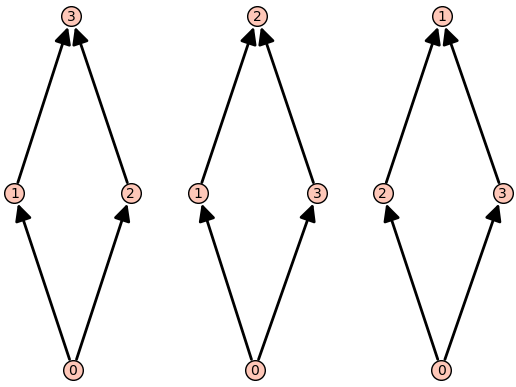

In [17]:
min_elem = 4
embed_dim = 3
Type = 1

graphics_array([P.poset.plot() for P in poset_finder(min_elem, embed_dim, Type)])